In [1]:
import pandas as pd
import numpy as np
from loaders import *

Changes made:
1. Switched MAC from being Imac to Fmac becuase of error message about "cannot find energy estimator"
2. Created 1 glb instead of 2, one for psum (expected depth: 1920) and one iacts (expected depth: 1536).
3. Chnaged the spatial architecture for the PE cluster from 3x4 to 4x4

In [2]:
config = dict(
    DRAM_factor_M=4096,
    DRAM_factor_N=4096,
    DRAM_factor_K=4096,
    DRAM_permutation=['K', 'N', 'M'],
    
    ClusterArray_factor_M=1,
    ClusterArray_factor_N=1,
    ClusterArray_factor_K=1,
    ClusterArray_permutation=['K', 'N', 'M'],
    
    GLB_Cluster_factor_M=1,
    GLB_Cluster_factor_N=1,
    GLB_Cluster_factor_K=1,
    GLB_Cluster_permutation=['K', 'N', 'M'],

    PE_Cluster_factor_M=1,
    PE_Cluster_factor_N=1,
    PE_Cluster_factor_K=1,
    PE_Cluster_permutation=['K', 'N', 'M'],

    iact_spad_factor_M=1,
    iact_spad_factor_N=1,
    iact_spad_factor_K=1,
    iact_spad_permutation=['K', 'N', 'M'],

    weight_spad_factor_M=1,
    weight_spad_factor_N=1,
    weight_spad_factor_K=1,
    weight_spad_permutation=['K', 'N', 'M'],

    psum_factor_M=1,
    psum_factor_N=1,
    psum_factor_K=1,
    psum_permutation=['K', 'N', 'M'],

    reg_factor_M=1,
    reg_factor_N=1,
    reg_factor_K=1,
    reg_permutation=['K', 'N', 'M'],

    density_weights=1, 
    density_inputs=1
) 

In [10]:
out = run_timeloop_model(
    config,
    problem='designs/baseline/baseline_problem.yaml',
    mapping='designs/baseline/baseline_mapping.yaml',
    sparse_optimizations='designs/baseline/baseline_sparse_opt.yaml', 
)
stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
print(stats)


[INFO] 2025-04-24 19:33:02,097 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1792 (224*8)
    Compute energy        : 15.57 pJ

    STATS
    -----
    Utilized instances (max)     : 1
    Utilized instances (average) : 1
    Cycles                       : 68719476736
    Algorithmic Computes (total) : 68719476736
    Actual Computes (total)      : 68719476736
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 1070278362372.51 pJ
    Area (total)                 : 5379153.94 um^2


Level 1
-------
=== reg ===

    SPECS
    -----
        Technology                      : SRAM
        Data storage size               : 1
        Data word bits                  : 8
        Data block size                 : 1
        Metadata storage width(bits)    : 4
        Metadata storage depth          : 1
        Cluster size                    : 1
       

In [43]:
!timeloop model ./output_dir/parsed-processed-input.yaml

Running apps: model
Found parsed-processed-input.yaml in input files. Running Timeloop without parsing or processing steps. If this is not the intended behavior, please name the input files differently.
input file: /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml
execute:/usr/local/bin/accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml --oprefix timeloop-model. -o ./ > timeloop-model.accelergy.log 2>&1
Start Parsering Layout
No Layout specified, so using bandwidth based modeling
Utilization = 0.00 | pJ/Algorithmic-Compute =  153.766 | pJ/Compute =  153.766 | Cycles = 68719476736


In [4]:
import numpy as np


density_vals = np.linspace(0.2, 1, 5)
metric_names = [
    "Computes per Cycle",
    "Compute Utilization",
    "fJ per Algorithmic Compute",
    "fJ per Compute"
]

heatmaps = {name: np.zeros((len(density_vals), len(density_vals))) for name in metric_names}

for i, density_weights in enumerate(density_vals): 
    for j, density_inputs in enumerate(density_vals): 
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml', 
            density_weights=density_weights, 
            density_inputs=density_inputs
        )

        computes_per_cycle = out.computes / out.cycles
        compute_utilization = out.percent_utilization
    
        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        fj_algo, fj_compute = None, None
        found_algo, found_compute = False, False
        for line in stats.split('\n'):
            if 'fJ/Algorithmic-Compute' in line:
                found_algo = True
            if 'fJ/Compute' in line:
                found_compute = True
            if found_algo and 'Total' in line and fj_algo is None:
                fj_algo = float(line.split('=')[-1].strip())
            if found_compute and 'Total' in line and fj_compute is None:
                fj_compute = float(line.split('=')[-1].strip())

    
        print(f'Density Weights: {density_weights}, Density Inputs: {density_inputs}')
        print(f'Compute Utilization: {compute_utilization}, Computes/Cycle: {computes_per_cycle}, fJ/Algorithmic-Compute: {fj_algo}, fJ/Compute: {fj_compute}')

        heatmaps["Computes per Cycle"][i, j] = computes_per_cycle
        heatmaps["Compute Utilization"][i, j] = compute_utilization
        heatmaps["fJ per Algorithmic Compute"][i, j] = fj_algo
        heatmaps["fJ per Compute"][i, j] = fj_compute


[INFO] 2025-04-14 14:35:49,608 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.2
Compute Utilization: 14.27, Computes/Cycle: 6393.756097560976, fJ/Algorithmic-Compute: 20497.9, fJ/Compute: 512445.01
[INFO] 2025-04-14 14:36:01,644 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.4
Compute Utilization: 14.28, Computes/Cycle: 3199.316552250191, fJ/Algorithmic-Compute: 24308.81, fJ/Compute: 303859.48
[INFO] 2025-04-14 14:36:13,538 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.6000000000000001
Compute Utilization: 14.28, Computes/Cycle: 2132.3355363497712, fJ/Algorithmic-Compute: 28119.74, fJ/Compute: 234330.96
[INFO] 2025-04-14 14:36:25,459 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 0.8
Compute Utilization: 14.28, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 31930.64, fJ/Compute: 199566.39
[INFO] 2025-04-14 14:36:37,368 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.2, Density Inputs: 1.0
Compute Utilization: 14.28, Computes/Cycle: 1279.9218797680805, fJ/Algorithmic-Compute: 35741.42, fJ/Compute: 178707.05
[INFO] 2025-04-14 14:36:49,414 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.2
Compute Utilization: 14.28, Computes/Cycle: 3199.316552250191, fJ/Algorithmic-Compute: 20551.74, fJ/Compute: 256896.23
[INFO] 2025-04-14 14:37:01,608 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.4
Compute Utilization: 14.28, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 24403.14, fJ/Compute: 152519.52
[INFO] 2025-04-14 14:37:13,636 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.6000000000000001
Compute Utilization: 14.28, Computes/Cycle: 1066.4388507500635, fJ/Algorithmic-Compute: 28254.52, fJ/Compute: 117727.06
[INFO] 2025-04-14 14:37:25,649 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 0.8
Compute Utilization: 14.29, Computes/Cycle: 799.9816898722106, fJ/Algorithmic-Compute: 32105.89, fJ/Compute: 100330.85
[INFO] 2025-04-14 14:37:37,449 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.4, Density Inputs: 1.0
Compute Utilization: 14.28, Computes/Cycle: 639.9609398840403, fJ/Algorithmic-Compute: 35957.14, fJ/Compute: 89892.82
[INFO] 2025-04-14 14:37:49,405 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.2
Compute Utilization: 14.28, Computes/Cycle: 2132.3355363497712, fJ/Algorithmic-Compute: 20605.74, fJ/Compute: 171714.36
[INFO] 2025-04-14 14:38:01,436 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.4
Compute Utilization: 14.28, Computes/Cycle: 1066.4388507500635, fJ/Algorithmic-Compute: 24497.6, fJ/Compute: 102073.21
[INFO] 2025-04-14 14:38:13,332 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.6000000000000001
Compute Utilization: 14.28, Computes/Cycle: 711.0194948296321, fJ/Algorithmic-Compute: 28389.44, fJ/Compute: 78859.52
[INFO] 2025-04-14 14:38:25,150 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 0.8
Compute Utilization: 14.28, Computes/Cycle: 533.2872218690401, fJ/Algorithmic-Compute: 32281.3, fJ/Compute: 67252.66
[INFO] 2025-04-14 14:38:37,150 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.6000000000000001, Density Inputs: 1.0
Compute Utilization: 14.28, Computes/Cycle: 426.6406265893602, fJ/Algorithmic-Compute: 36173.0, fJ/Compute: 60288.31
[INFO] 2025-04-14 14:38:49,149 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.2
Compute Utilization: 14.28, Computes/Cycle: 1599.6582761250954, fJ/Algorithmic-Compute: 20659.59, fJ/Compute: 129122.37
[INFO] 2025-04-14 14:39:01,226 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.4
Compute Utilization: 14.29, Computes/Cycle: 799.9816898722106, fJ/Algorithmic-Compute: 24591.91, fJ/Compute: 76849.69
[INFO] 2025-04-14 14:39:13,244 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.6000000000000001
Compute Utilization: 14.28, Computes/Cycle: 533.2872218690401, fJ/Algorithmic-Compute: 28524.25, fJ/Compute: 59425.48
[INFO] 2025-04-14 14:39:25,130 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 0.8
Compute Utilization: 14.29, Computes/Cycle: 399.9908449361053, fJ/Algorithmic-Compute: 32456.56, fJ/Compute: 50713.35
[INFO] 2025-04-14 14:39:37,121 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 0.8, Density Inputs: 1.0
Compute Utilization: 14.28, Computes/Cycle: 319.98046994202014, fJ/Algorithmic-Compute: 36388.73, fJ/Compute: 45485.9
[INFO] 2025-04-14 14:39:49,170 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.2
Compute Utilization: 14.28, Computes/Cycle: 1279.9218797680805, fJ/Algorithmic-Compute: 20713.45, fJ/Compute: 103567.23
[INFO] 2025-04-14 14:40:01,046 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.4
Compute Utilization: 14.28, Computes/Cycle: 639.9609398840403, fJ/Algorithmic-Compute: 24686.25, fJ/Compute: 61715.61
[INFO] 2025-04-14 14:40:13,063 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.6000000000000001
Compute Utilization: 14.28, Computes/Cycle: 426.6406265893602, fJ/Algorithmic-Compute: 28659.04, fJ/Compute: 47765.06
[INFO] 2025-04-14 14:40:24,911 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 0.8
Compute Utilization: 14.28, Computes/Cycle: 319.98046994202014, fJ/Algorithmic-Compute: 32631.83, fJ/Compute: 40789.78
[INFO] 2025-04-14 14:40:36,705 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


Density Weights: 1.0, Density Inputs: 1.0
Compute Utilization: 14.29, Computes/Cycle: 256.0, fJ/Algorithmic-Compute: 36604.46, fJ/Compute: 36604.46


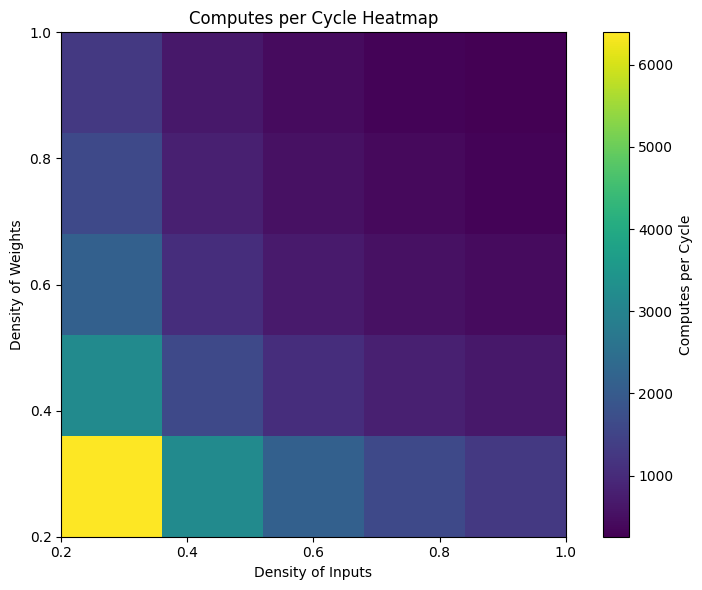

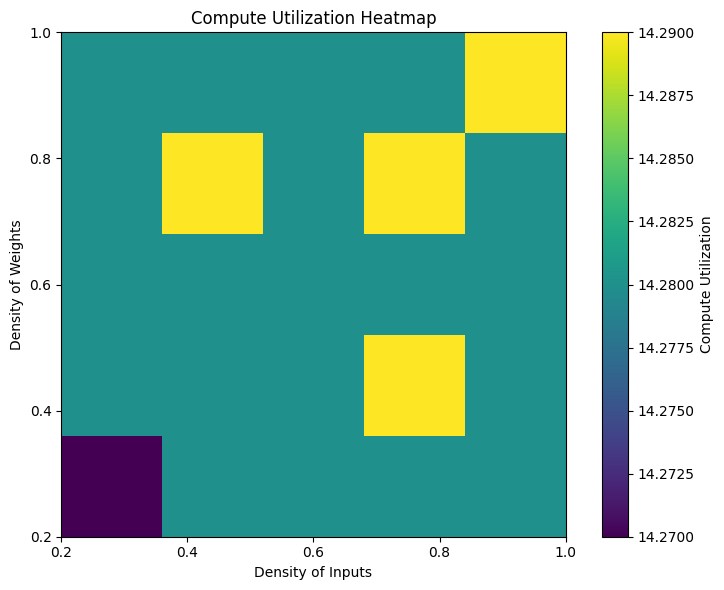

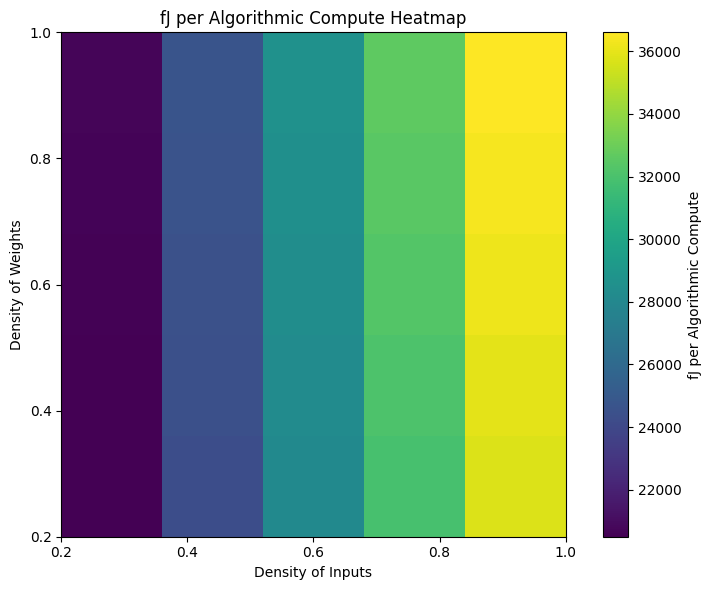

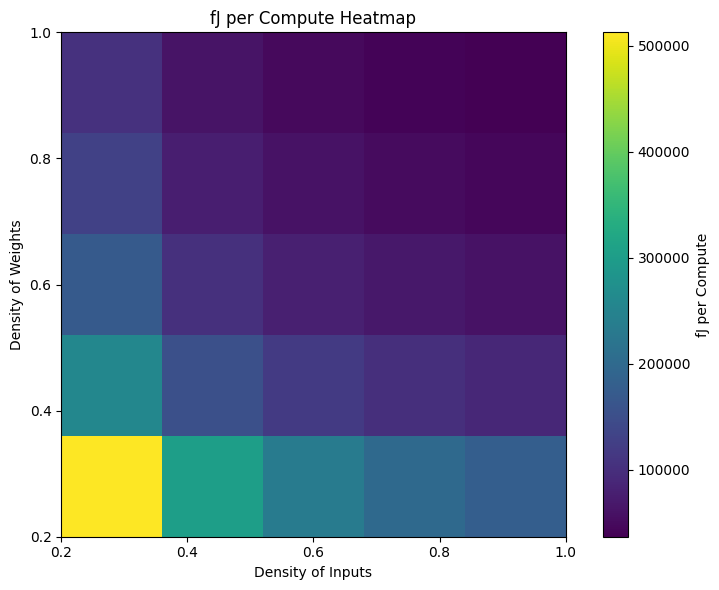

In [5]:
import matplotlib.pyplot as plt

for metric, heatmap in heatmaps.items():
    plt.figure(figsize=(8, 6))
    im = plt.imshow(heatmap, origin='lower', cmap='viridis',
                    extent=[density_vals[0], density_vals[-1], density_vals[0], density_vals[-1]])
    plt.colorbar(im, label=metric)
    plt.xlabel('Density of Inputs')
    plt.ylabel('Density of Weights')
    plt.title(f'{metric} Heatmap')
    plt.xticks(density_vals)
    plt.yticks(density_vals)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

[INFO] 2025-04-14 14:40:50,518 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:41:02,981 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:41:15,011 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:41:27,057 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:41:39,307 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:41:51,451 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:42:03,492 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:42:15,624 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:42:27,894 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:42:40,000 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:42:52,112 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:43:04,160 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:43:16,092 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:43:28,118 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:43:39,867 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:43:51,882 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:44:03,886 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:44:15,840 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:44:28,004 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:44:40,051 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:44:51,972 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:45:03,922 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:45:15,889 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:45:27,959 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:45:39,909 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


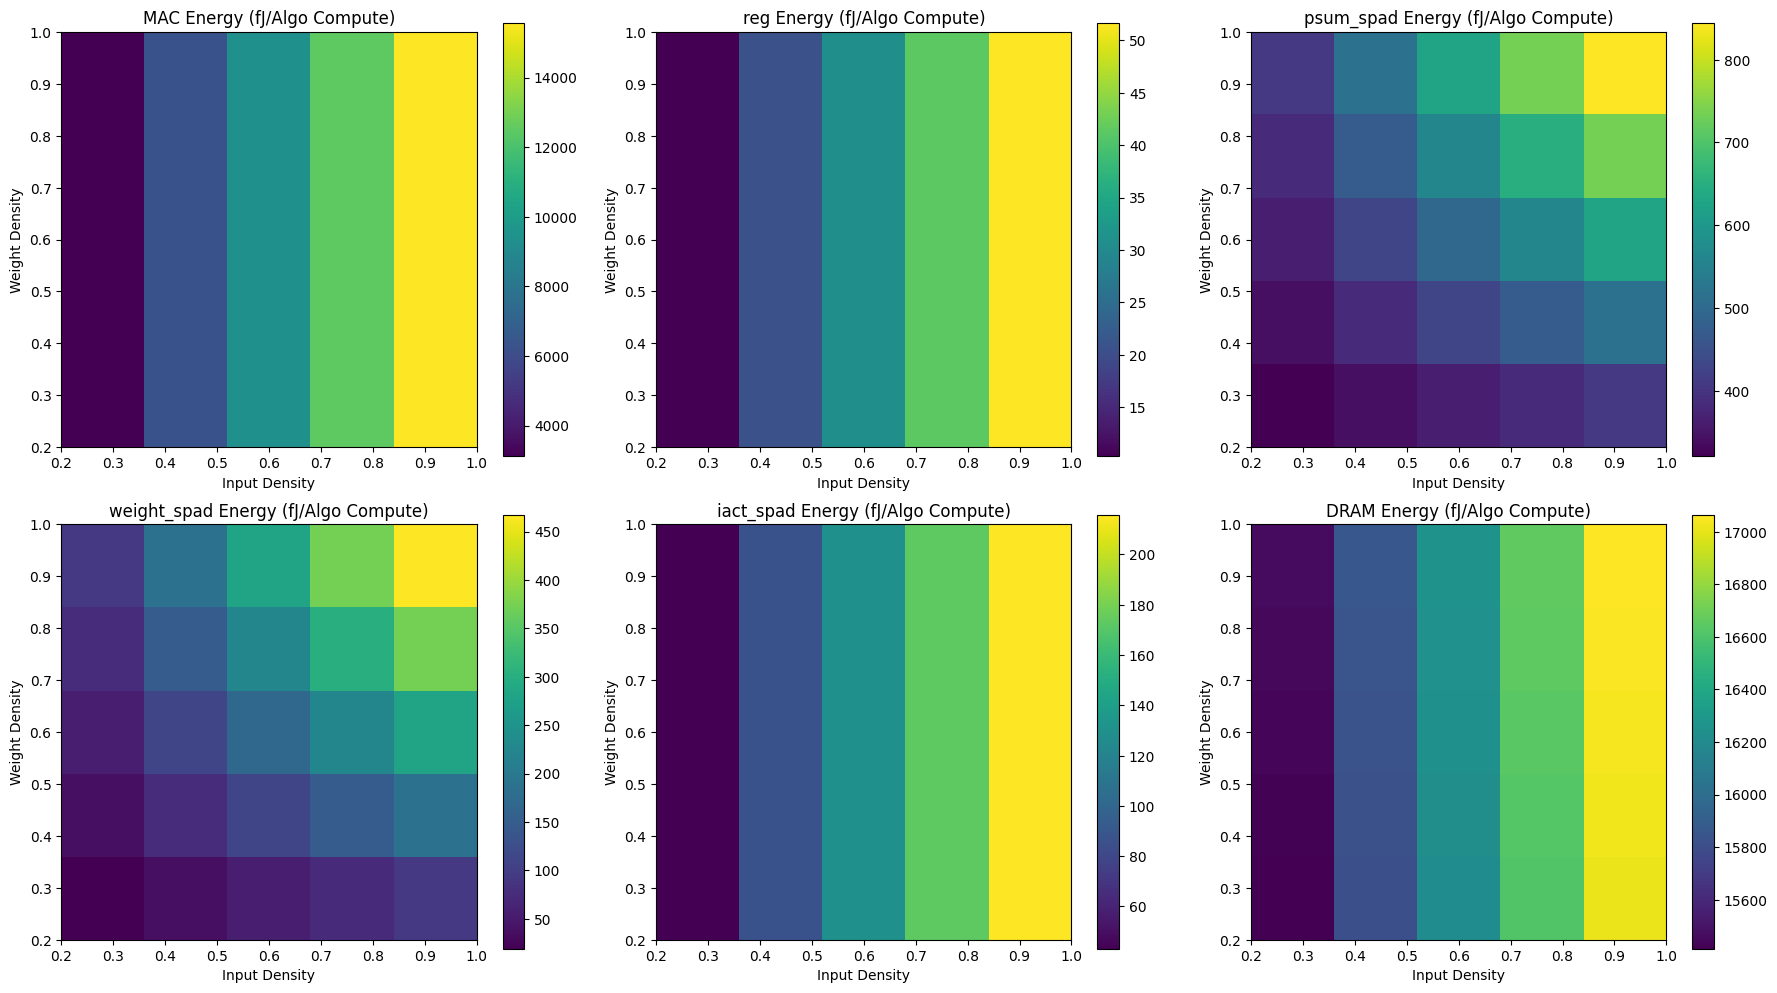

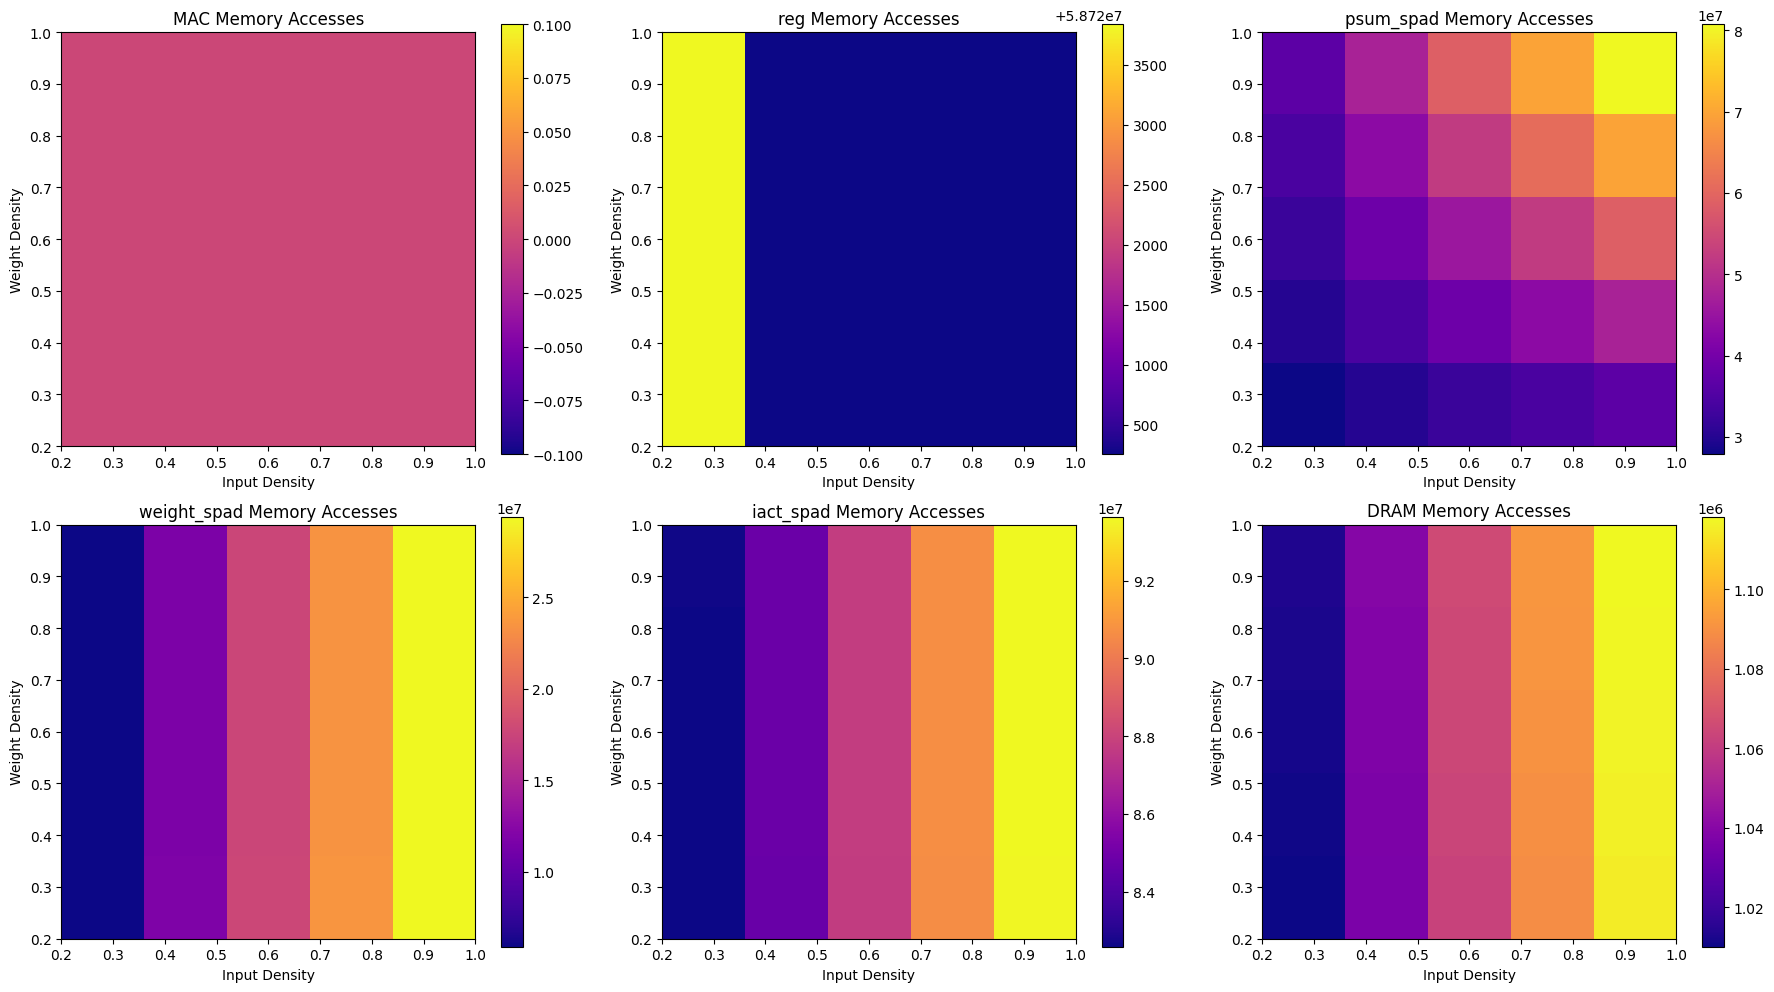

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import re

density_vals = np.linspace(0.2, 1.0, 5)
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']
energy_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
memory_access_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}

def extract_energy_and_traffic(stats):
    energies = {}
    accesses = {comp: 0 for comp in components}
    lines = stats.split('\n')
    
    # --- Energy ---
    in_energy_section = False
    for line in lines:
        if "fJ/Algorithmic-Compute" in line:
            in_energy_section = True
            continue
        if in_energy_section:
            if line.strip() == "":
                break
            parts = line.split('=')
            if len(parts) == 2:
                key = parts[0].strip().split()[0]
                val = float(parts[1].strip())
                energies[key] = val

    # --- Memory Accesses ---
    current_comp = None
    instances = 1
    for line in lines:
        if line.strip().startswith("==="):
            match = re.match(r"=== (\w+) ===", line.strip())
            if match and match.group(1) in components:
                current_comp = match.group(1)
                instances = 1  # reset
        elif current_comp:
            if "Instances" in line and "(" in line:
                instances = int(re.search(r"(\d+)", line).group(1))
            elif any(k in line for k in ["Actual scalar reads", "Actual scalar fills", "Actual scalar updates"]):
                try:
                    val = int(line.split(':')[-1].strip().split()[0])
                    accesses[current_comp] += val * instances
                except:
                    pass

    return energies, accesses


# Run experiments across densities
for i, density_weights in enumerate(density_vals):
    for j, density_inputs in enumerate(density_vals):
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml',
            density_weights=density_weights,
            density_inputs=density_inputs
        )

        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        energies, accesses = extract_energy_and_traffic(stats)

        for comp in components:
            energy_breakdown[comp][i, j] = energies.get(comp, 0)
            memory_access_breakdown[comp][i, j] = accesses.get(comp, 0)

# Plot energy heatmaps
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(energy_breakdown[comp], origin='lower', cmap='viridis', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Energy (fJ/Algo Compute)')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# Plot memory accesses
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(memory_access_breakdown[comp], origin='lower', cmap='plasma', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Memory Accesses')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


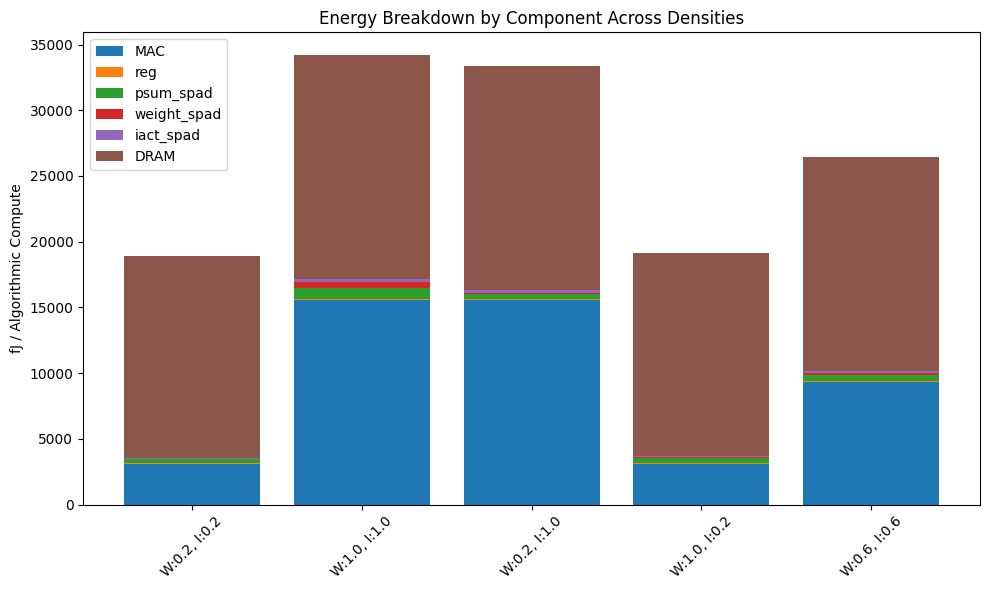

In [7]:
# Pick representative points: low/low, high/high, low/high, high/low, mid/mid
sample_indices = [(0, 0), (4, 4), (0, 4), (4, 0), (2, 2)]
labels = [f"W:{density_vals[i]:.1f}, I:{density_vals[j]:.1f}" for (i, j) in sample_indices]

# Stack component energy contributions
component_colors = {
    'MAC': 'tab:blue',
    'reg': 'tab:orange',
    'psum_spad': 'tab:green',
    'weight_spad': 'tab:red',
    'iact_spad': 'tab:purple',
    'DRAM': 'tab:brown'
}

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(sample_indices))

for comp in components:
    vals = [energy_breakdown[comp][i, j] for (i, j) in sample_indices]
    ax.bar(labels, vals, bottom=bottom, label=comp, color=component_colors[comp])
    bottom += np.array(vals)

ax.set_ylabel("fJ / Algorithmic Compute")
ax.set_title("Energy Breakdown by Component Across Densities")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

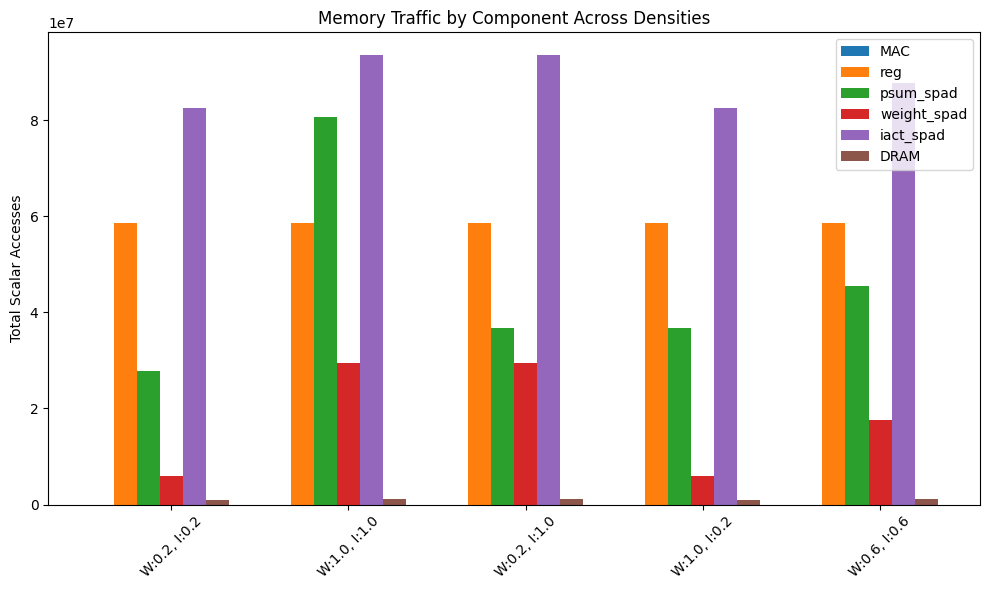

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(sample_indices))  # label locations
width = 0.13  # bar width

for idx, comp in enumerate(components):
    offsets = x + (idx - len(components)/2) * width
    vals = [memory_access_breakdown[comp][i, j] for (i, j) in sample_indices]
    ax.bar(offsets, vals, width, label=comp, color=component_colors[comp])

ax.set_ylabel("Total Scalar Accesses")
ax.set_title("Memory Traffic by Component Across Densities")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
# Pick fixed points for slicing
fixed_w_idx = -1  # highest weight density 
fixed_i_idx = -1  # highest input density 

def plot_line(y_data, ylabel, title):
    x = density_vals
    plt.figure(figsize=(8, 5))
    for label, y in y_data.items():
        plt.plot(x, y, marker='o', label=label)
    plt.xlabel("Density")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
density_vals = np.linspace(0.2, 1.0, 5)
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']
energy_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
memory_access_breakdown = {comp: np.zeros((len(density_vals), len(density_vals))) for comp in components}
compute_utilization = np.zeros((len(density_vals), len(density_vals)))
computes_per_cycle = np.zeros((len(density_vals), len(density_vals)))

os.makedirs("figures", exist_ok=True)
os.makedirs("arrays", exist_ok=True)

def extract_energy_and_traffic(stats):
    energies = {}
    accesses = {comp: 0 for comp in components}
    lines = stats.split('\n')
    
    in_energy_section = False
    for line in lines:
        if "fJ/Algorithmic-Compute" in line:
            in_energy_section = True
            continue
        if in_energy_section:
            if line.strip() == "":
                break
            parts = line.split('=')
            if len(parts) == 2:
                key = parts[0].strip().split()[0]
                val = float(parts[1].strip())
                energies[key] = val

    current_comp = None
    instances = 1
    for line in lines:
        if line.strip().startswith("==="):
            match = re.match(r"=== (\w+) ===", line.strip())
            if match and match.group(1) in components:
                current_comp = match.group(1)
                instances = 1
        elif current_comp:
            if "Instances" in line and "(" in line:
                instances = int(re.search(r"(\d+)", line).group(1))
            elif any(k in line for k in ["Actual scalar reads", "Actual scalar fills", "Actual scalar updates"]):
                try:
                    val = int(line.split(':')[-1].strip().split()[0])
                    accesses[current_comp] += val * instances
                except:
                    pass

    return energies, accesses

# Run experiments across densities
for i, density_weights in enumerate(density_vals):
    for j, density_inputs in enumerate(density_vals):
        out = run_timeloop_model(
            problem='L07_problem.yaml',
            mapping='L07_mapping.yaml',
            sparse_optimizations='L07_sparse_opt.yaml',
            density_weights=density_weights,
            density_inputs=density_inputs
        )

        stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
        energies, accesses = extract_energy_and_traffic(stats)

        for comp in components:
            energy_breakdown[comp][i, j] = energies.get(comp, 0)
            memory_access_breakdown[comp][i, j] = accesses.get(comp, 0)

        computes_per_cycle[i, j] = out.computes / out.cycles
        compute_utilization[i, j] = out.percent_utilization


[INFO] 2025-04-14 14:45:54,080 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:46:06,053 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:46:18,108 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:46:30,306 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:46:42,361 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:46:54,361 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:47:06,323 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:47:18,302 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:47:30,314 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:47:42,137 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:47:54,148 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:48:06,320 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:48:18,366 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:48:30,465 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:48:42,378 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:48:54,512 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:49:06,378 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:49:18,386 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:49:30,296 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:49:42,048 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:49:54,015 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:50:05,941 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:50:17,855 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:50:29,907 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-14 14:50:41,923 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project_v4/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


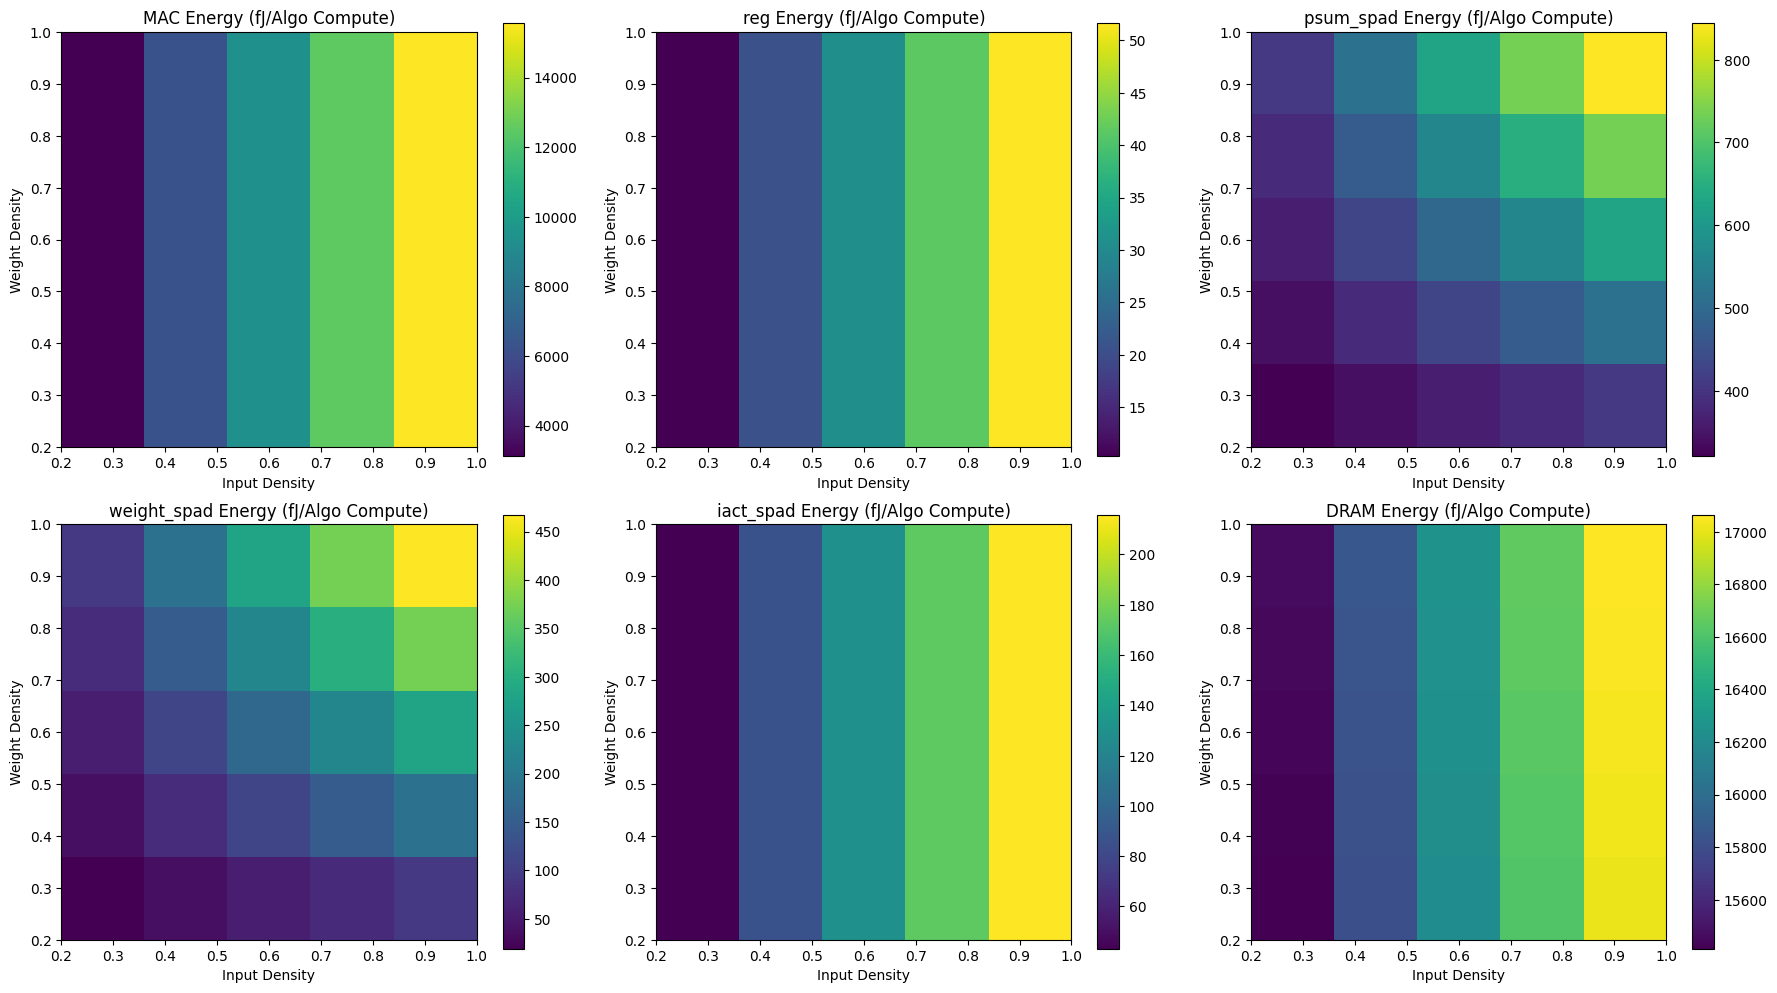

In [11]:
# Plot energy heatmaps
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(energy_breakdown[comp], origin='lower', cmap='viridis', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Energy (fJ/Algo Compute)')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
fig.tight_layout()
fig.savefig("figures/energy_heatmaps.png")
plt.show()
plt.close(fig)

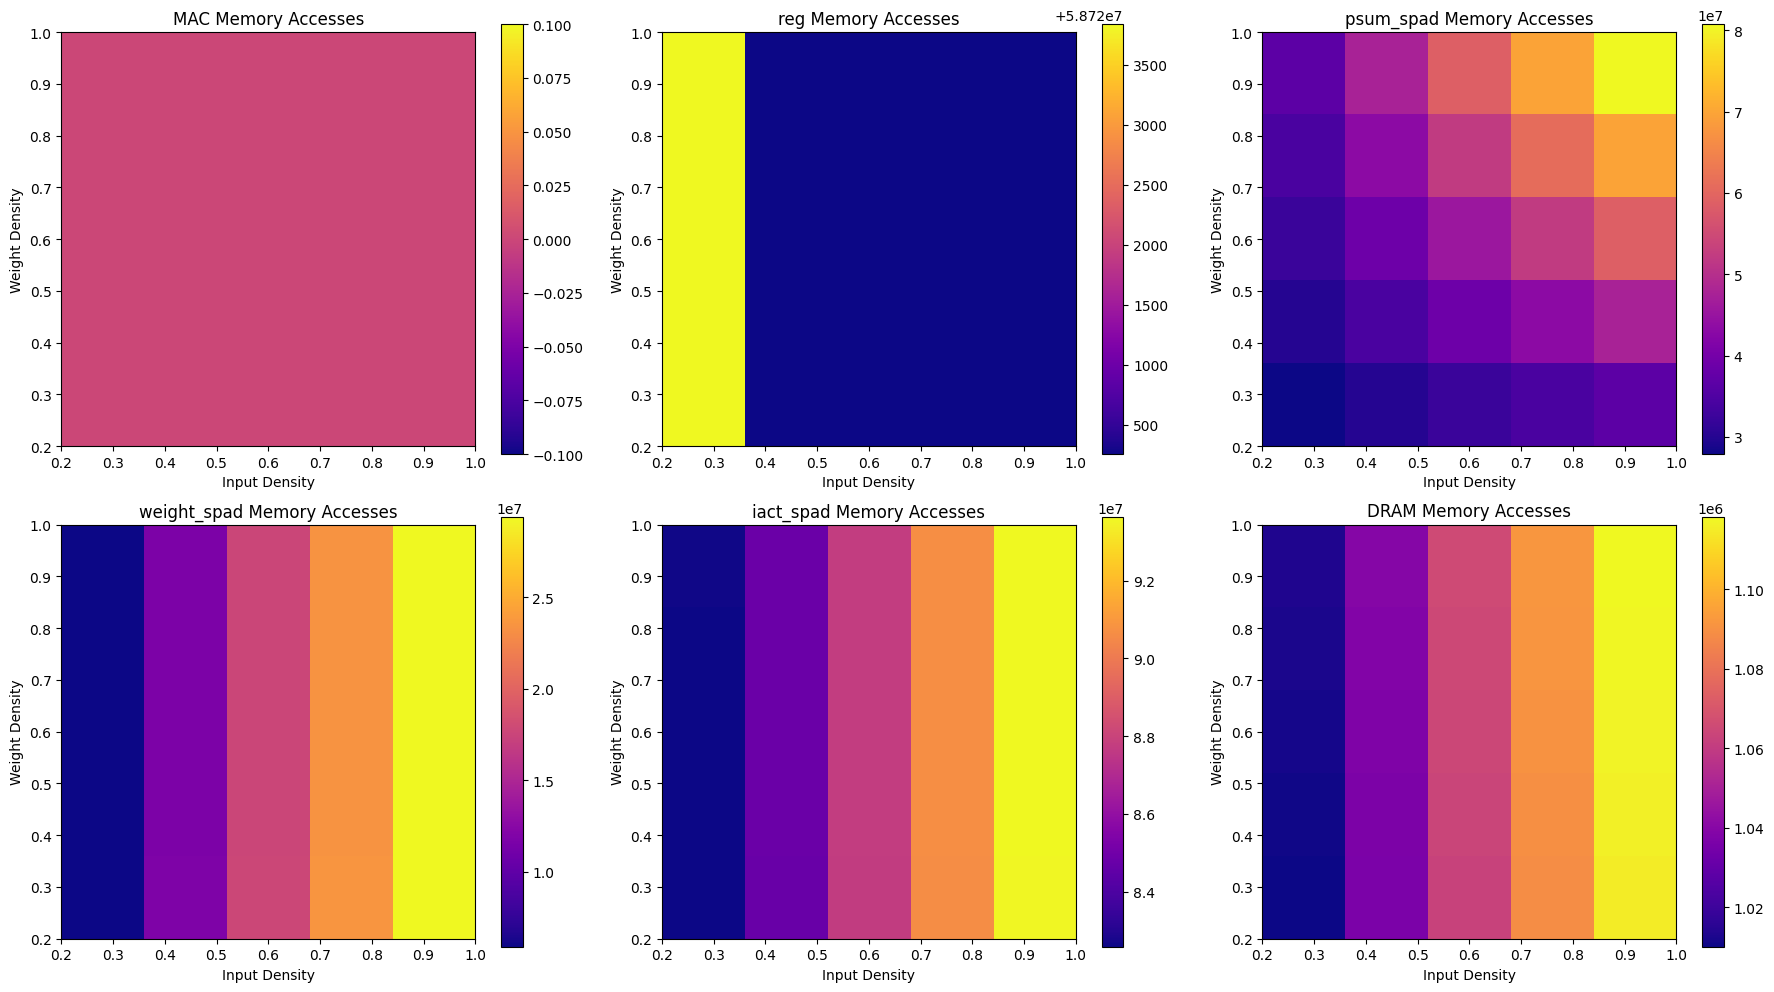

In [12]:
# Plot memory accesses
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for idx, comp in enumerate(components):
    ax = axs[idx//3, idx%3]
    im = ax.imshow(memory_access_breakdown[comp], origin='lower', cmap='plasma', extent=[0.2, 1.0, 0.2, 1.0])
    ax.set_title(f'{comp} Memory Accesses')
    ax.set_xlabel('Input Density')
    ax.set_ylabel('Weight Density')
    plt.colorbar(im, ax=ax)
fig.tight_layout()
fig.savefig("figures/memory_access_heatmaps.png")
plt.show()
plt.close(fig)

In [13]:
fixed_w_idx = -1  
fixed_i_idx = -1 

def plot_line(y_data, ylabel, title, filename):
    x = density_vals
    fig, ax = plt.subplots(figsize=(8, 5))
    for label, y in y_data.items():
        ax.plot(x, y, marker='o', label=label)
    ax.set_xlabel("Density")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    fig.tight_layout()
    plt.show()
    # fig.savefig(f"figures/{filename}")
    # plt.close(fig)

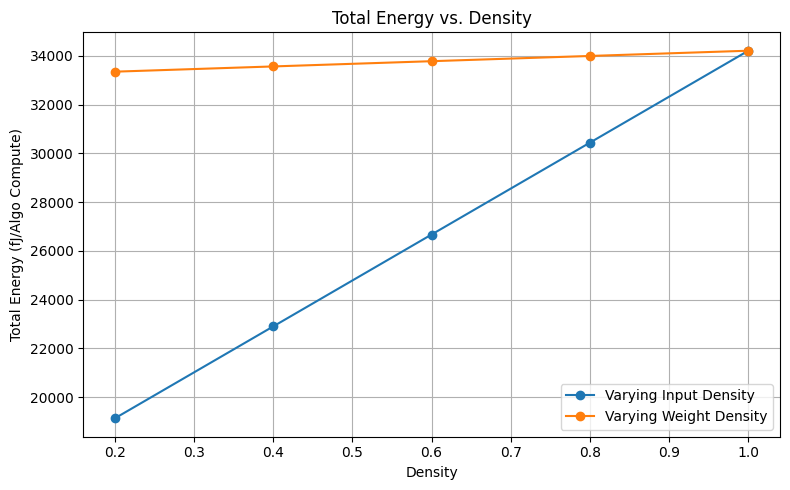

In [15]:
plot_line(
    {"Varying Input Density": np.sum([energy_breakdown[c][fixed_w_idx, :] for c in components], axis=0),
     "Varying Weight Density": np.sum([energy_breakdown[c][:, fixed_i_idx] for c in components], axis=0)},
    "Total Energy (fJ/Algo Compute)",
    "Total Energy vs. Density",
    "total_energy_line.png"
)

# plot_line(
#     {"Varying Input Density": energy_breakdown["DRAM"][fixed_w_idx, :],
#      "Varying Weight Density": energy_breakdown["DRAM"][:, fixed_i_idx]},
#     "DRAM Energy (fJ/Algo Compute)",
#     "DRAM Energy vs. Density",
#     "dram_energy_line.png"
# )

# plot_line(
#     {"Varying Input Density": np.sum([memory_access_breakdown[c][fixed_w_idx, :] for c in components], axis=0),
#      "Varying Weight Density": np.sum([memory_access_breakdown[c][:, fixed_i_idx] for c in components], axis=0)},
#     "Total Memory Accesses",
#     "Memory Accesses vs. Density",
#     "total_memory_line.png"
# )

# plot_line(
#     {"Varying Input Density": memory_access_breakdown["DRAM"][fixed_w_idx, :],
#      "Varying Weight Density": memory_access_breakdown["DRAM"][:, fixed_i_idx]},
#     "DRAM Accesses",
#     "DRAM Memory Accesses vs. Density",
#     "dram_memory_line.png"
# )

# plot_line(
#     {"Varying Input Density": compute_utilization[fixed_w_idx, :],
#      "Varying Weight Density": compute_utilization[:, fixed_i_idx]},
#     "Compute Utilization (%)",
#     "Utilization vs. Density",
#     "utilization_line.png"
# )

# plot_line(
#     {"Varying Input Density": computes_per_cycle[fixed_w_idx, :],
#      "Varying Weight Density": computes_per_cycle[:, fixed_i_idx]},
#     "Computes per Cycle",
#     "Throughput vs. Density",
#     "computes_per_cycle_line.png"
# )

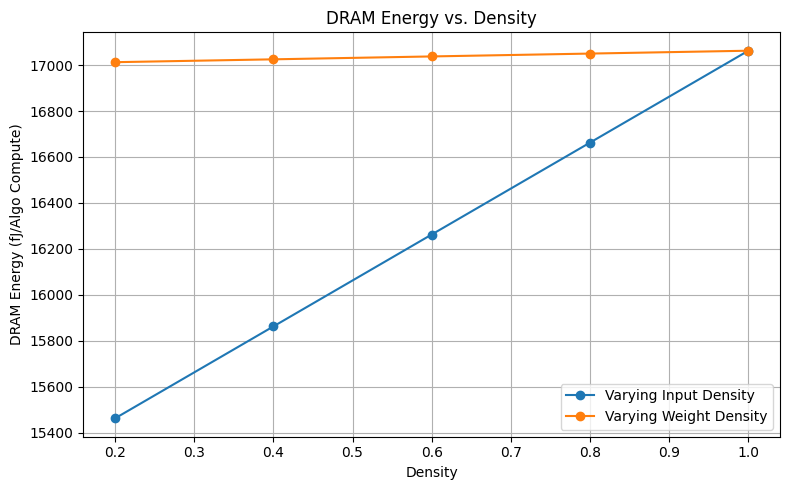

In [16]:
plot_line(
    {"Varying Input Density": energy_breakdown["DRAM"][fixed_w_idx, :],
     "Varying Weight Density": energy_breakdown["DRAM"][:, fixed_i_idx]},
    "DRAM Energy (fJ/Algo Compute)",
    "DRAM Energy vs. Density",
    "dram_energy_line.png"
)

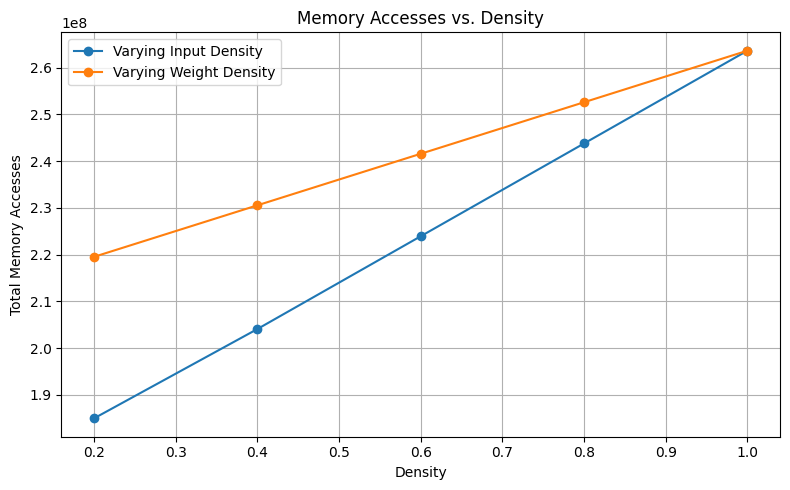

In [17]:
plot_line(
    {"Varying Input Density": np.sum([memory_access_breakdown[c][fixed_w_idx, :] for c in components], axis=0),
     "Varying Weight Density": np.sum([memory_access_breakdown[c][:, fixed_i_idx] for c in components], axis=0)},
    "Total Memory Accesses",
    "Memory Accesses vs. Density",
    "total_memory_line.png"
)

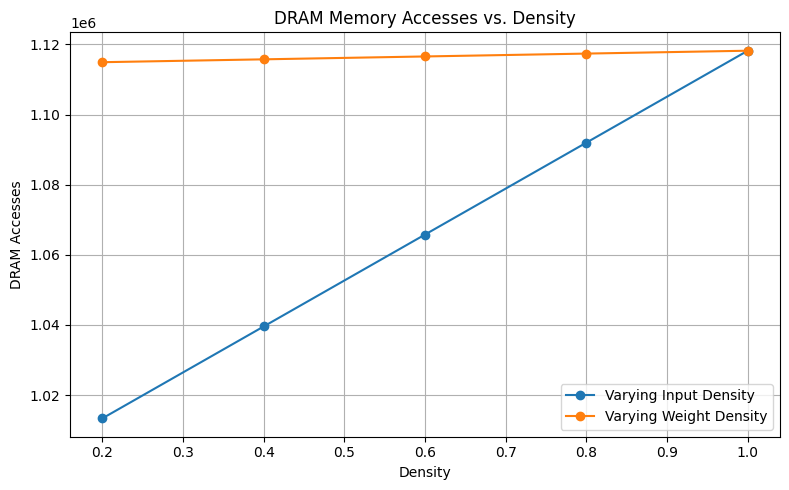

In [18]:
plot_line(
    {"Varying Input Density": memory_access_breakdown["DRAM"][fixed_w_idx, :],
     "Varying Weight Density": memory_access_breakdown["DRAM"][:, fixed_i_idx]},
    "DRAM Accesses",
    "DRAM Memory Accesses vs. Density",
    "dram_memory_line.png"
)

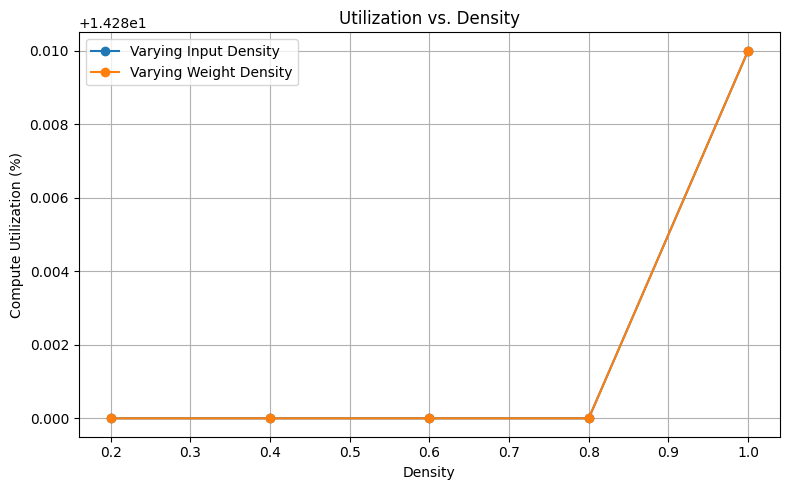

In [19]:
plot_line(
    {"Varying Input Density": compute_utilization[fixed_w_idx, :],
     "Varying Weight Density": compute_utilization[:, fixed_i_idx]},
    "Compute Utilization (%)",
    "Utilization vs. Density",
    "utilization_line.png"
)

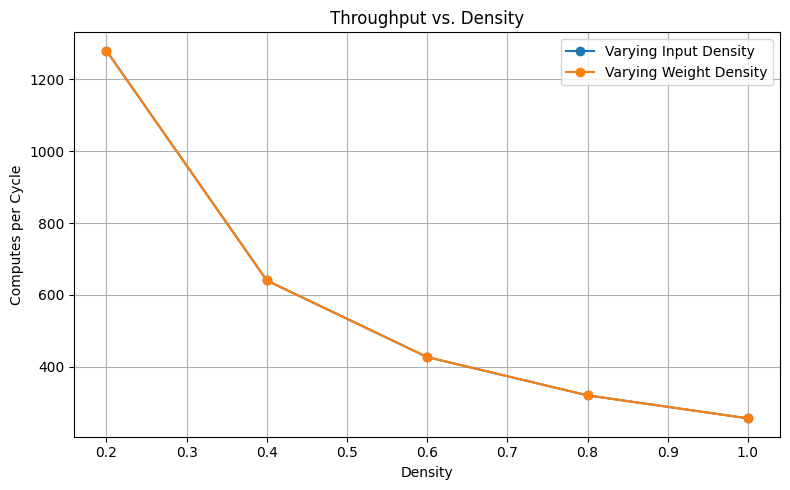

In [20]:
plot_line(
    {"Varying Input Density": computes_per_cycle[fixed_w_idx, :],
     "Varying Weight Density": computes_per_cycle[:, fixed_i_idx]},
    "Computes per Cycle",
    "Throughput vs. Density",
    "computes_per_cycle_line.png"
)

In [21]:
print(stats)

Buffer and Arithmetic Levels
----------------------------
Level 0
-------
=== MAC ===

    SPECS
    -----
    Word bits             : 8
    Instances             : 1792 (224*8)
    Compute energy        : 15.57 pJ

    STATS
    -----
    Utilized instances (max)     : 256
    Utilized instances (average) : 256
    Cycles                       : 16384
    Algorithmic Computes (total) : 4194304
    Actual Computes (total)      : 4194304
    Gated Computes (total)       : 0
    Skipped Computes (total)     : 0
    Energy (total)               : 65324607.08 pJ
    Area (total)                 : 5379153.94 um^2


Level 1
-------
=== reg ===

    SPECS
    -----
        Technology                      : SRAM
        Data storage size               : 1
        Data word bits                  : 8
        Data block size                 : 1
        Metadata storage width(bits)    : 4
        Metadata storage depth          : 1
        Cluster size                    : 1
        Instances     